<a href="https://colab.research.google.com/github/Axel02leon/Intro-to-Machine-Learning-/blob/main/Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and Data**

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.impute import SimpleImputer


dataset = "https://raw.githubusercontent.com/Axel02leon/Intro-to-Machine-Learning-/refs/heads/main/Homework_2/Housing.csv"
df = pd.read_csv(dataset)
dfhead = df.head()

print(dfhead)

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


# **Problem 1a.**
Develop a gradient decent training and evaluation code, from scratch, that predicts housing price based on the following input variables:
*   area
*   bedrooms
*   bathrooms
*   stories
*   parking







In [ ]:
x_input = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Split the data into training 80% and validation 20% sets
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.8, test_size=0.2, random_state=100)

# Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(df_train[x_input].values)
y_train = df_train['price'].values.reshape(-1, 1)
x_val = scaler.transform(df_test[x_input].values)
y_val = df_test['price'].values.reshape(-1, 1)

In [ ]:
# Add a bias term
x_b_train = np.c_[np.ones((len(x_train), 1)), x_train]
x_b_val = np.c_[np.ones((len(x_val), 1)), x_val]

In [ ]:
# Initialize parameters
learning_rate = 0.01
n_iterations = 1000
m = len(x_b_train)

In [ ]:
# Initialize theta (weights)
theta = np.zeros((x_b_train.shape[1], 1))

In [ ]:
# Lists to store training and validation losses
train_losses = []
val_losses = []

In [ ]:
# Gradient Descent Loop
for iteration in range(n_iterations):
    # Compute gradients
    gradients = (2/m) * x_b_train.T.dot(x_b_train.dot(theta) - y_train)

    # Update theta
    theta -= learning_rate * gradients

    # Calculate training loss
    train_loss = (1/m) * np.sum(np.square(x_b_train.dot(theta) - y_train))
    train_losses.append(train_loss)

    # Calculate validation loss
    val_loss = (1/len(x_val)) * np.sum(np.square(x_b_val.dot(theta) - y_val))
    val_losses.append(val_loss)

In [ ]:
# Print final theta values
print("Final theta values:", theta)

Final theta values: [[4795729.21211243]
 [ 729932.49231811]
 [  79337.72871799]
 [ 641263.77204067]
 [ 463853.76945824]
 [ 287330.7228612 ]]


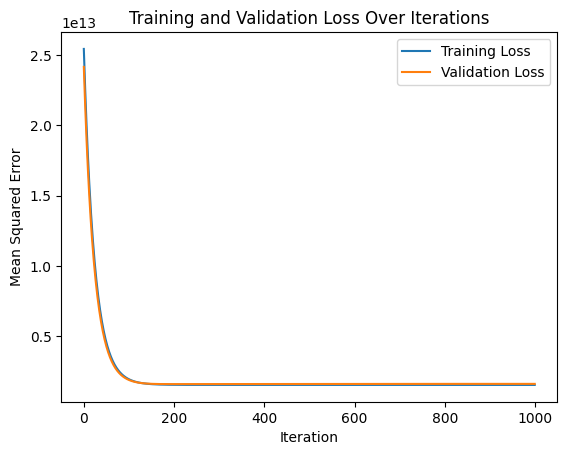

In [ ]:
# Plot the training and validation loss after each iteration
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

# **Problem 1b.**

Develop a gradient decent training and evaluation code, from scratch, that predicts housing price based on the following input variables:
*   Area
*   bedrooms
*   bathrooms
*   stories
*   mainroad
*   guestroom
*   basement
*   hotwaterheating
*   airconditioning
*   parking
*   prefarea

In [ ]:
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Split the data into training 80% and validation 20% sets
np.random.seed(0)

# Create a map function to handle 'yes' and 'no'
def binary_map(x):
  return x.map({'yes': 1, 'no': 0})

# Apply the function to the x_input
df[varlist] = df[varlist].apply(binary_map)

x_input = ['area', 'bedrooms', 'bathrooms', 'stories'] + varlist


In [ ]:
df_train, df_test = train_test_split(df, train_size=0.8, test_size=0.2, random_state=100)
scaler = StandardScaler()
x_train = scaler.fit_transform(df_train[x_input].values)
y_train = df_train['price'].values.reshape(-1, 1)
x_val = scaler.transform(df_test[x_input].values)
y_val = df_test['price'].values.reshape(-1, 1)

In [ ]:
# Add a bias term
x_b_train = np.c_[np.ones((len(x_train), 1)), x_train]
x_b_val = np.c_[np.ones((len(x_val), 1)), x_val]

In [ ]:
# Initialize parameters
learning_rate = 0.01
n_iterations = 1000
m = len(x_b_train)

In [ ]:
# Initialize theta (weights)
theta = np.zeros((x_b_train.shape[1], 1))

In [ ]:
# Lists to store training and validation losses
train_losses = []
val_losses = []

In [ ]:
# Gradient Descent Loop
for iteration in range(n_iterations):
    # Compute gradients
    gradients = (2/m) * x_b_train.T.dot(x_b_train.dot(theta) - y_train)

    # Update theta
    theta -= learning_rate * gradients

    # Calculate training loss
    train_loss = (1/m) * np.sum(np.square(x_b_train.dot(theta) - y_train))
    train_losses.append(train_loss)

    # Calculate validation loss
    val_loss = (1/len(x_val)) * np.sum(np.square(x_b_val.dot(theta) - y_val))
    val_losses.append(val_loss)

    # Optional: Print the loss every 100 iterations
    if iteration % 100 == 0:
        print(f"Iteration {iteration}: Train Loss: {train_loss}, Val Loss: {val_loss}")

Iteration 0: Train Loss: 25383628784231.203, Val Loss: 24055836181367.723
Iteration 100: Train Loss: 1587562714835.6997, Val Loss: 1435544393005.0095
Iteration 200: Train Loss: 1197494130999.2761, Val Loss: 1241301604423.768
Iteration 300: Train Loss: 1190181840067.1226, Val Loss: 1257837142484.3643
Iteration 400: Train Loss: 1189994344400.304, Val Loss: 1260489176201.9858
Iteration 500: Train Loss: 1189981583055.714, Val Loss: 1260632747019.6504
Iteration 600: Train Loss: 1189979662315.6726, Val Loss: 1260520412663.325
Iteration 700: Train Loss: 1189979309675.1194, Val Loss: 1260436731847.8823
Iteration 800: Train Loss: 1189979242291.8801, Val Loss: 1260391984767.6763
Iteration 900: Train Loss: 1189979229260.676, Val Loss: 1260370192663.5093


In [ ]:
# Print final theta values
print("Final theta values:", theta)

Final theta values: [[4795729.21211243]
 [ 592965.81231581]
 [  95825.53977715]
 [ 593538.86436188]
 [ 343100.13163127]
 [ 237368.13417378]
 [ 132563.88198547]
 [ 139134.95189148]
 [ 222898.8158081 ]
 [ 428014.59457885]
 [ 253089.41283374]]


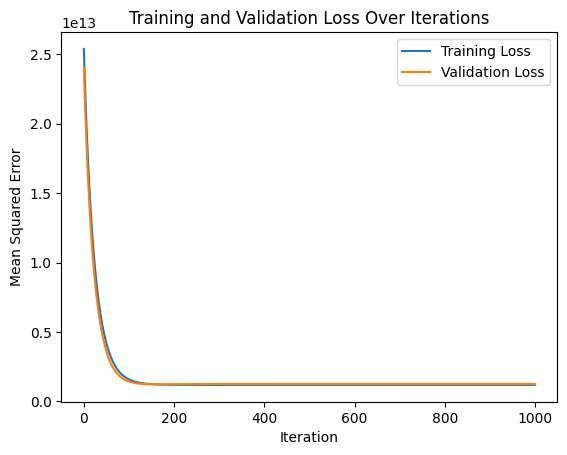

In [ ]:
# Plot the training and validation loss after each iteration
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

# **Problem 2a**


Repeat problem 1a, this time with input normalization and input standardization as part of your pre-processing logic. You need to perform two separate trainings for standardization and normalization. ***`In both cases, you do not need to normalize the output!`***

In [ ]:
x_input = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Split the data into training 80% and validation 20% sets
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.8, test_size=0.2, random_state=100)

# Output variable
y_train = df_train['price'].values.reshape(-1, 1)
y_val = df_test['price'].values.reshape(-1, 1)


In [ ]:
# Function to perform gradient descent training
def train_gradient_descent(x_train, y_train, x_val, y_val, learning_rate = 0.05, n_iterations = 800):
    # Add a bias term
    x_b_train = np.c_[np.ones((len(x_train), 1)), x_train]
    x_b_val = np.c_[np.ones((len(x_val), 1)), x_val]

    # Initialize theta (weights)
    m = len(x_b_train)
    theta = np.zeros((x_b_train.shape[1], 1))

    # Lists to store training and validation losses
    train_losses = []
    val_losses = []

    # Gradient Descent Loop
    for iteration in range(n_iterations):
        # Compute gradients
        gradients = (2/m) * x_b_train.T.dot(x_b_train.dot(theta) - y_train)
        # Update theta
        theta -= learning_rate * gradients
        # Calculate training loss
        train_loss = (1/m) * np.sum(np.square(x_b_train.dot(theta) - y_train))
        train_losses.append(train_loss)
        # Calculate validation loss
        val_loss = (1/len(x_val)) * np.sum(np.square(x_b_val.dot(theta) - y_val))
        val_losses.append(val_loss)

    return train_losses, val_losses, theta

In [ ]:
# Input Standardization
scaler_standard = StandardScaler()
x_train_standard = scaler_standard.fit_transform(df_train[x_input].values)
x_val_standard = scaler_standard.transform(df_test[x_input].values)

In [ ]:
# Input Normalization
scaler_normal = MinMaxScaler()
x_train_normal = scaler_normal.fit_transform(df_train[x_input].values)
x_val_normal = scaler_normal.transform(df_test[x_input].values)

In [ ]:
# Train using Standardization
train_losses_standard, val_losses_standard, theta_standard = train_gradient_descent(x_train_standard, y_train, x_val_standard, y_val)

# Train using Normalization
train_losses_normal, val_losses_normal, theta_normal = train_gradient_descent(x_train_normal, y_train, x_val_normal, y_val)

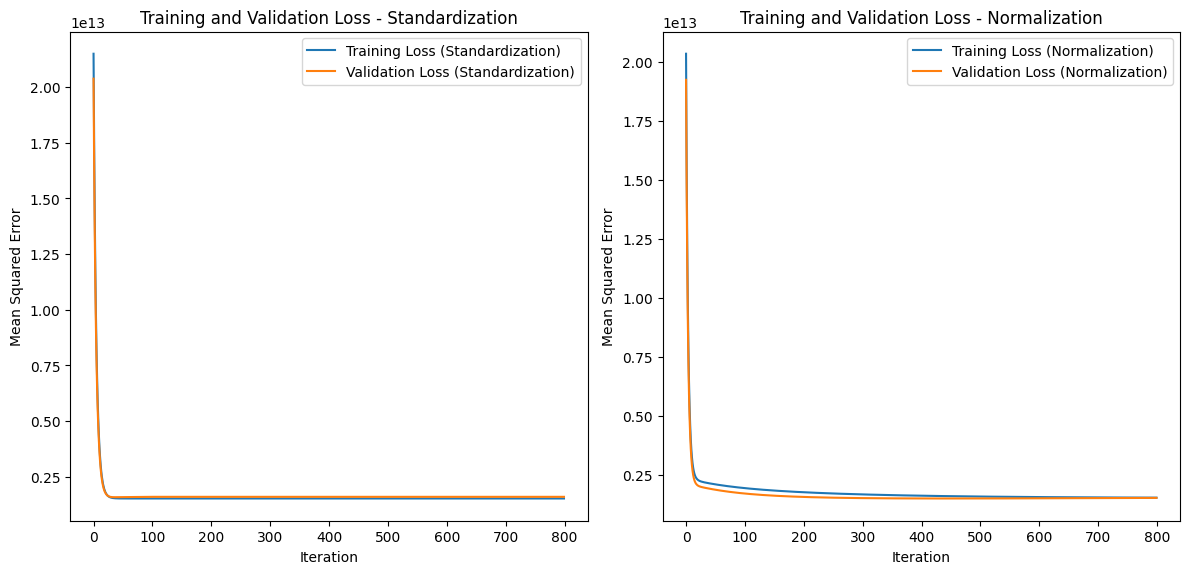

Final Training Loss (Standardization): 1522069682826.878
Final Validation Loss (Standardization): 1596534488482.435
Final Training Loss (Normalization): 1542771702725.9067
Final Validation Loss (Normalization): 1532969136956.659


In [ ]:
# Plotting the results
plt.figure(figsize=(12, 6))

# Standardization losses
plt.subplot(1, 2, 1)
plt.plot(train_losses_standard, label="Training Loss (Standardization)")
plt.plot(val_losses_standard, label="Validation Loss (Standardization)")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss - Standardization")
plt.legend()

# Normalization losses
plt.subplot(1, 2, 2)
plt.plot(train_losses_normal, label="Training Loss (Normalization)")
plt.plot(val_losses_normal, label="Validation Loss (Normalization)")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss - Normalization")
plt.legend()

plt.tight_layout()
plt.show()

# Compare final losses
final_train_loss_standard = train_losses_standard[-1]
final_val_loss_standard = val_losses_standard[-1]
final_train_loss_normal = train_losses_normal[-1]
final_val_loss_normal = val_losses_normal[-1]

print(f"Final Training Loss (Standardization): {final_train_loss_standard}")
print(f"Final Validation Loss (Standardization): {final_val_loss_standard}")
print(f"Final Training Loss (Normalization): {final_train_loss_normal}")
print(f"Final Validation Loss (Normalization): {final_val_loss_normal}")

# **Problem 2b**

Repeat problem 1 b, this time with input normalization and input standardization as part of your pre-processing logic. You need to perform two separate trainings for standardization and normalization. ***`In both cases, you do not need to normalize the output!`***

In [ ]:
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
y_output = 'price'

def binary_map(x):
    # Map 'yes' to 1, 'no' to 0, and handle by mapping to 0 (or you can choose another default)
    return x.map({'yes': 1, 'no': 0}).fillna(0)  # Fill NaN values with 0

df[varlist] = df[varlist].apply(binary_map)

In [ ]:
# Split the data into training (80%) and validation (20%) sets
df_train, df_test = train_test_split(df, train_size=0.8, test_size=0.2, random_state=100)

In [ ]:
# Extract input and output values
X_train = df_train[x_input].values
y_train = df_train[y_output].values
X_val = df_test[x_input].values
y_val = df_test[y_output].values

In [ ]:
# Define the gradient descent function
def gradient_descent(X, y, learning_rate=0.10, num_iterations=750):
    m, n = X.shape
    theta = np.zeros(n)
    loss_history = []

    for i in range(num_iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        cost = (1 / (2 * m)) * np.sum(errors ** 2)
        loss_history.append(cost)
        theta -= (learning_rate / m) * X.T.dot(errors)

    return theta, loss_history

# Function to evaluate the model
def evaluate_model(X, y, theta):
    predictions = X.dot(theta)
    loss = mean_squared_error(y, predictions)
    return loss

# Function to train and evaluate the model with a specific scaling method
def train_and_evaluate(X_train, y_train, X_val, y_val, scaler):
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Train the model
    theta, loss_history = gradient_descent(X_train_scaled, y_train)

    # Evaluate model performance
    train_loss = evaluate_model(X_train_scaled, y_train, theta)
    val_loss = evaluate_model(X_val_scaled, y_val, theta)

    return train_loss, val_loss, loss_history

In [ ]:
# Normalization
norm_scaler = MinMaxScaler()
train_loss_normal, val_loss_normal, loss_history_normal = train_and_evaluate(
    X_train, y_train, X_val, y_val, norm_scaler
)

# Standardization
std_scaler = StandardScaler()
train_loss_standard, val_loss_standard, loss_history_standard = train_and_evaluate(
    X_train, y_train, X_val, y_val, std_scaler
)

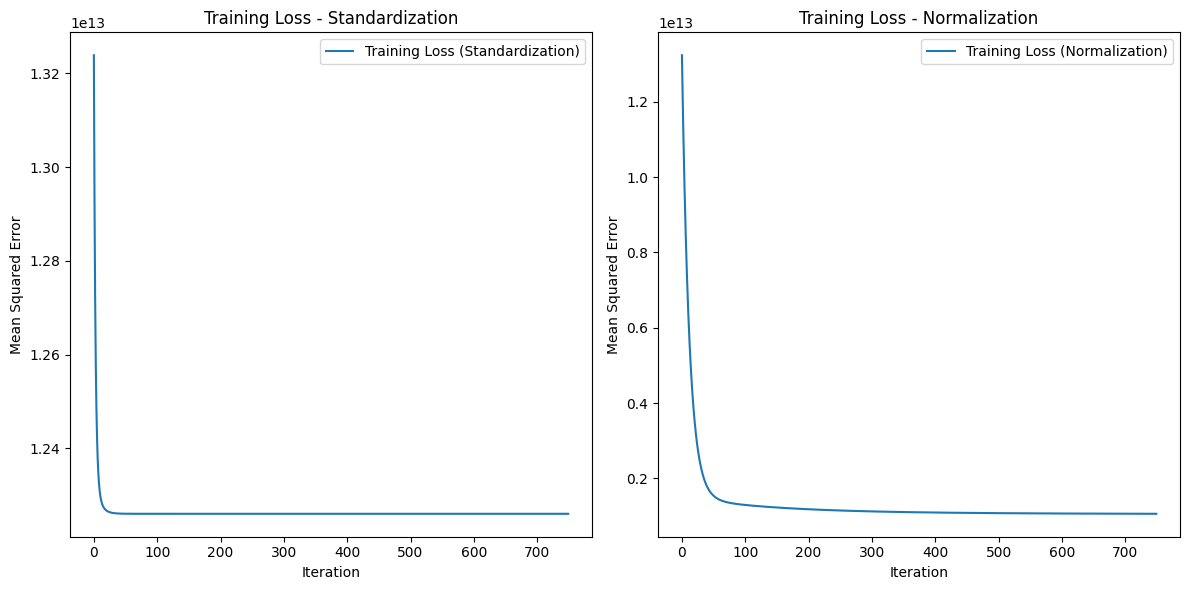

Final Training Loss (Standardization): 24521088436148.586
Final Validation Loss (Standardization): 24256058335371.297
Final Training Loss (Normalization): 2118774370356.776
Final Validation Loss (Normalization): 1936262356671.7537


In [ ]:
# Plotting the results
plt.figure(figsize=(12, 6))

# Plot standardization losses
plt.subplot(1, 2, 1)
plt.plot(loss_history_standard, label="Training Loss (Standardization)")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training Loss - Standardization")
plt.legend()

# Plot normalization losses
plt.subplot(1, 2, 2)
plt.plot(loss_history_normal, label="Training Loss (Normalization)")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training Loss - Normalization")
plt.legend()

plt.tight_layout()
plt.show()

# Compare final losses
print(f"Final Training Loss (Standardization): {train_loss_standard}")
print(f"Final Validation Loss (Standardization): {val_loss_standard}")
print(f"Final Training Loss (Normalization): {train_loss_normal}")
print(f"Final Validation Loss (Normalization): {val_loss_normal}")

# **Problem 3a**

Repeat problem 2 a, this time by adding a parameters penalty to your loss function. Note that in this case, you need to modify the gradient decent logic for your training set, but you don’t need to change your loss for the evaluation set.  

Plot your results (both training and evaluation losses) for the best input scaling approach (standardization or normalization). Explain your results and compare them against problem 2 a.

In [ ]:
def compute_losses_with_regularization(X_train, X_val, y_train, y_val, theta, lambd, learning_rate, n_iterations):
    """
    Computes cost for linear regression with regularization on training and validation data.

    Parameters:
    X_train : The features of the training data with the bias term included.
    X_val : The features of the validation data with the bias term included.
    y_train : The ground truth of the training data.
    y_val : The ground truth of the validation data.
    theta : Initial weights (fitting parameters).
    lambd : Regularization strength.
    learning_rate : The learning rate for gradient descent.
    n_iterations : Number of iterations to run gradient descent.

    Returns:
    train_losses : Array containing the training loss values at each iteration.
    val_losses : Array containing the validation loss values at each iteration.
    theta : Final optimized weights after training.
    """
    m = len(y_train)
    train_losses = []
    val_losses = []

    for i in range(n_iterations):
        # Compute hypothesis/prediction for training data
        h_theta = X_train.dot(theta)

        # Compute gradients with L2 regularization
        gradients = (2/m) * X_train.T.dot(h_theta - y_train)
        theta = theta * (1 - learning_rate * (lambd / m)) - (learning_rate * gradients)

        # Compute training loss (with regularization)
        train_loss = (1/m) * np.sum(np.square(h_theta - y_train)) + (lambd / (2*m)) * np.sum(np.square(theta[1:]))  # Ignore bias term for regularization
        train_losses.append(train_loss)

        # Compute validation loss (without regularization)
        val_loss = (1/len(y_val)) * np.sum(np.square(X_val.dot(theta) - y_val))
        val_losses.append(val_loss)

    return train_losses, val_losses, theta


In [ ]:
# Split the data into training and validation sets
df_train, df_test = train_test_split(df, train_size=0.8, test_size=0.2, random_state=100)

# Features and target for training and validation (using the x_input features)
X_train = df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y_train = df_train['price'].values.reshape(-1, 1)

X_val = df_test[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y_val = df_test['price'].values.reshape(-1, 1)

# Normalization with MinMaxScaler
normalizer = MinMaxScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_val_norm = normalizer.transform(X_val)

# Add bias term (column of ones)
X_train_norm_bias = np.c_[np.ones((X_train_norm.shape[0], 1)), X_train_norm]
X_val_norm_bias = np.c_[np.ones((X_val_norm.shape[0], 1)), X_val_norm]

# Standardization with StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_val_std = scaler.transform(X_val)

# Add bias term (column of ones)
X_train_std_bias = np.c_[np.ones((X_train_std.shape[0], 1)), X_train_std]
X_val_std_bias = np.c_[np.ones((X_val_std.shape[0], 1)), X_val_std]


In [ ]:
# Initialize theta (6 features including bias term)
theta = np.zeros((6, 1))

# Set regularization strength and learning rate
lambd = 5  # Regularization parameter
learning_rate = 0.01
n_iterations = 300


In [ ]:
# Train with normalization
train_losses_norm, val_losses_norm, theta_norm = compute_losses_with_regularization(
    X_train_norm_bias, X_val_norm_bias, y_train, y_val, theta, lambd, learning_rate, n_iterations)

# Train with standardization
train_losses_std, val_losses_std, theta_std = compute_losses_with_regularization(
    X_train_std_bias, X_val_std_bias, y_train, y_val, theta, lambd, learning_rate, n_iterations)


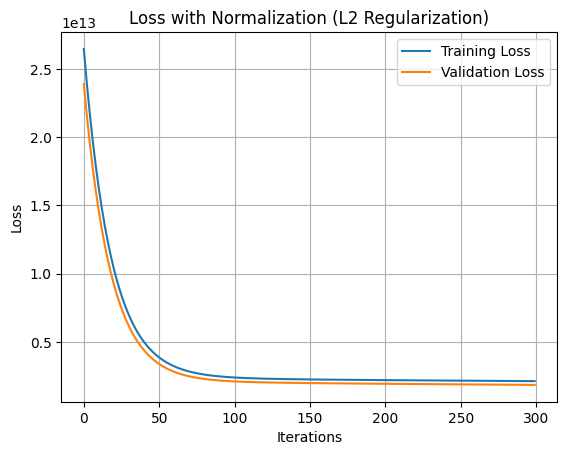

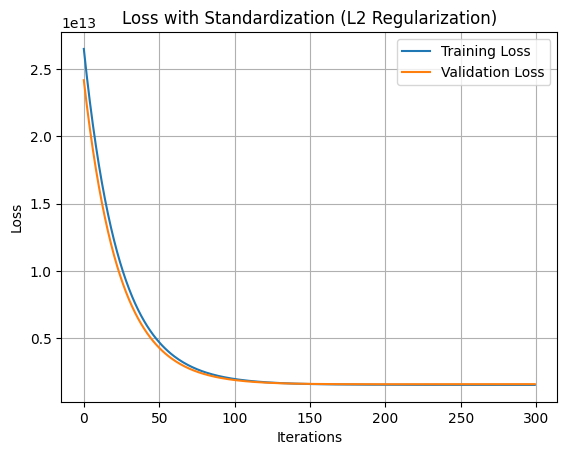

In [ ]:
def plot_losses(train_losses, val_losses, title):
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title(title)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot results for normalization
plot_losses(train_losses_norm, val_losses_norm, title="Loss with Normalization (L2 Regularization)")

# Plot results for standardization
plot_losses(train_losses_std, val_losses_std, title="Loss with Standardization (L2 Regularization)")


# **Problem 3b**

Repeat problem 2 b, this time by adding a parameters penalty to your loss function. Note that in this case, you need to modify the gradient decent logic for your training set, but you don’t need to change your loss for the evaluation set.  
Plot your results (both training and evaluation losses) for the best input scaling approach (standardization or normalization). Explain your results and compare them against problem 2 b.

In [ ]:
# Define the input features and output variable based on Problem 2b
x_input = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
y_output = 'price'

# Create the training and validation sets
X_train = df_train[x_input].values
y_train = df_train[y_output].values.reshape(-1, 1)

X_val = df_test[x_input].values
y_val = df_test[y_output].values.reshape(-1, 1)


In [ ]:
# Normalization with MinMaxScaler
normalizer = MinMaxScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_val_norm = normalizer.transform(X_val)

# Add bias term (column of ones)
X_train_norm_bias = np.c_[np.ones((X_train_norm.shape[0], 1)), X_train_norm]
X_val_norm_bias = np.c_[np.ones((X_val_norm.shape[0], 1)), X_val_norm]


In [ ]:
# Standardization with StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_val_std = scaler.transform(X_val)

# Add bias term (column of ones)
X_train_std_bias = np.c_[np.ones((X_train_std.shape[0], 1)), X_train_std]
X_val_std_bias = np.c_[np.ones((X_val_std.shape[0], 1)), X_val_std]


In [ ]:
# Initialize theta (11 features including bias term)
theta = np.zeros((11, 1))

# Set regularization strength and learning rate
lambd = 5  # Regularization parameter
learning_rate = 0.01
n_iterations = 300


In [ ]:
# Train with normalization
train_losses_norm_3b, val_losses_norm_3b, theta_norm_3b = compute_losses_with_regularization(
    X_train_norm_bias, X_val_norm_bias, y_train, y_val, theta, lambd, learning_rate, n_iterations)

# Train with standardization
train_losses_std_3b, val_losses_std_3b, theta_std_3b = compute_losses_with_regularization(
    X_train_std_bias, X_val_std_bias, y_train, y_val, theta, lambd, learning_rate, n_iterations)


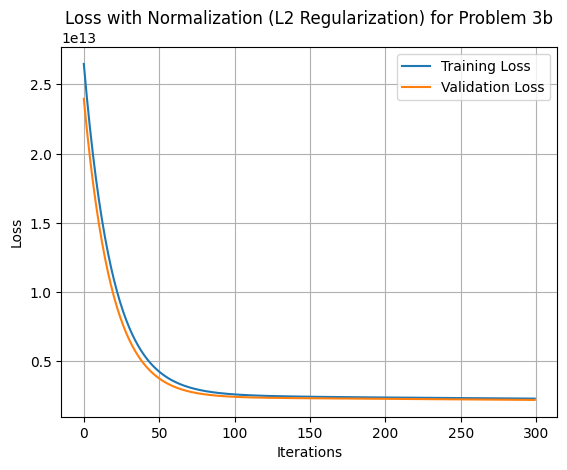

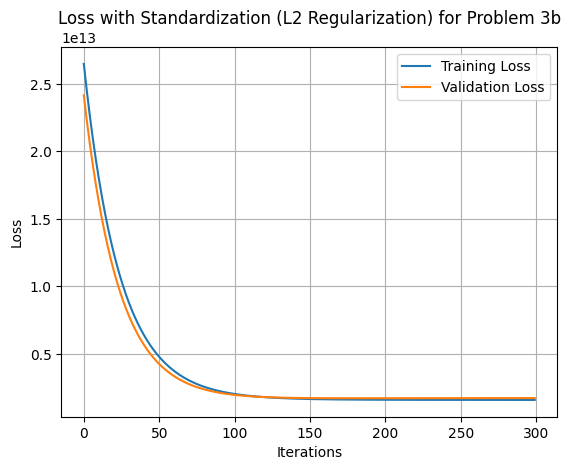

In [ ]:
# Plot results for normalization
plot_losses(train_losses_norm_3b, val_losses_norm_3b, title="Loss with Normalization (L2 Regularization) for Problem 3b")

# Plot results for standardization
plot_losses(train_losses_std_3b, val_losses_std_3b, title="Loss with Standardization (L2 Regularization) for Problem 3b")
